In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import scipy.stats as sc
import statsmodels.api as sm

In [2]:
data = pd.read_excel(r'C:\Users\matth\OneDrive\Desktop\PythonDataAnalysis\data.xlsx') # made up data set
data.head(5) # displaying the data

,ID,Sex,Age(yrs),Height(in),Weight(lbs),Level of injury,DXA%Fat,BODPOD%Fat
0,1,Male,31,73,213.00,T3,35.5,39.6
1,2,Male,31,72,260.00,T4,30.5,29.7
2,3,Male,38,69,186.80,T9,47.2,40.7
3,4,Female,32,57,212.00,C4,40.7,38.2
4,5,Male,55,71,193.75,C4,48.4,49.9


In [3]:
male = data[data["Sex"] == 'Male'] # Male column
female = data[data["Sex"] == 'Female'] # Female column

df = pd.DataFrame(data=data,columns=["DXA%Fat","BODPOD%Fat"])
dxa_array = df["DXA%Fat"].to_numpy() # dxa results
bodpod_array = df["BODPOD%Fat"].to_numpy() # bodpod results

dxa = data[["DXA%Fat"]] # dxa results column
bodpod = data[["BODPOD%Fat"]] # bodpod results column

c1 = data[data["Level of injury"] == "C1"] # pulling each LOI out to concat
c2 = data[data["Level of injury"] == "C2"]
c3 = data[data["Level of injury"] == "C3"]
c4 = data[data["Level of injury"] == "C4"]
c5 = data[data["Level of injury"] == "C5"]
c6 = data[data["Level of injury"] == "C6"]
c7 = data[data["Level of injury"] == "C7"]

t1 = data[data["Level of injury"] == "T1"]
t2 = data[data["Level of injury"] == "T2"]
t3 = data[data["Level of injury"] == "T3"]
t4 = data[data["Level of injury"] == "T4"]
t5 = data[data["Level of injury"] == "T5"]
t6 = data[data["Level of injury"] == "T6"]
t7 = data[data["Level of injury"] == "T7"]
t8 = data[data["Level of injury"] == "T8"]
t9 = data[data["Level of injury"] == "T9"]
t10 = data[data["Level of injury"] == "T10"]
t11 = data[data["Level of injury"] == "T11"]
t12 = data[data["Level of injury"] == "T12"]

cervical = pd.concat([c1, c2, c3, c4, c5, c6, c7]) # all cervical particpants
thoracic = pd.concat([t1, t2, t3, t4, t5, t6, t7, t8, t9, t10, t11, t12]) # all thoracic particpants

c_male = cervical[cervical["Sex"] == "Male"] # separating the LOI by Sex/Level to graph
t_male = thoracic[thoracic["Sex"] == "Male"]
c_female = cervical[cervical["Sex"] == "Female"]
t_female = thoracic[thoracic["Sex"] == "Female"]


In [4]:
demo_mean = data[["Age(yrs)", "Height(in)", "Weight(lbs)", "DXA%Fat", "BODPOD%Fat"]].mean() # getting avg for sample
demo_stdev = data[["Age(yrs)", "Height(in)", "Weight(lbs)", "DXA%Fat", "BODPOD%Fat"]].std() # getting stdev for sample
dm = np.array(demo_mean)
ds = np.array(demo_stdev)  # creating arrays to make it easier to create table

male_demo_mean = male[["Age(yrs)", "Height(in)", "Weight(lbs)", "DXA%Fat", "BODPOD%Fat"]].mean() # below is getting avg/stdev by sex 
male_demo_stdev = male[["Age(yrs)", "Height(in)", "Weight(lbs)", "DXA%Fat", "BODPOD%Fat"]].std() 
mdm = np.array(male_demo_mean)
mds = np.array(male_demo_stdev)

female_demo_mean  = female[["Age(yrs)", "Height(in)", "Weight(lbs)", "DXA%Fat", "BODPOD%Fat"]].mean() 
female_demo_stdev  = female[["Age(yrs)", "Height(in)", "Weight(lbs)", "DXA%Fat", "BODPOD%Fat"]].std() 
fdm = np.array(female_demo_mean)
fds = np.array(female_demo_stdev)


In [5]:
demo_table = {'Total (n = 51)': ['34.37 ± 12.01', '69.08 ± 4.46', '171.93 ± 37.13', '37.46 ± 7.54', '32.97 ± 10.87'],
             'Male (n = 37)': ['35.49 ± 11.54', '71.22 ± 2.48', '180.87 ± 32.68', '36.98 ± 7.30', '33.45 ± 9.71'],
             'Female (n = 14)': ['31.42 ± 13.16', '63.42 ± 3.47', '148.02 ± 41.56', '38.70 ± 8.30', '31.67 ± 13.80']} #dict

demo_table_df = pd.DataFrame(demo_table, columns = ['Total (n = 51)', 'Male (n = 37)', 'Female (n = 14)'],
                            index = ['Age(yrs)', 'Ht(in)', 'Wt(lbs)', 'DXA%BF', 'BODPOD%BF']) # creating table from dict

print(demo_table_df) #showing a table of demographics

           Total (n = 51)   Male (n = 37) Female (n = 14)
Age(yrs)    34.37 ± 12.01   35.49 ± 11.54   31.42 ± 13.16
Ht(in)       69.08 ± 4.46    71.22 ± 2.48    63.42 ± 3.47
Wt(lbs)    171.93 ± 37.13  180.87 ± 32.68  148.02 ± 41.56
DXA%BF       37.46 ± 7.54    36.98 ± 7.30    38.70 ± 8.30
BODPOD%BF   32.97 ± 10.87    33.45 ± 9.71   31.67 ± 13.80


ShapiroResult(statistic=0.9771267175674438, pvalue=0.42498278617858887)

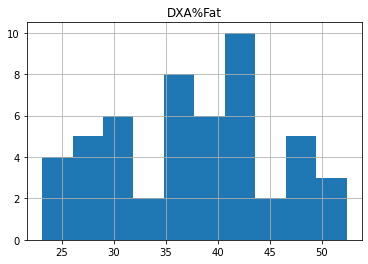

In [6]:
# Checking to see if data is normally distributed
dxa.hist()
sc.shapiro(dxa_array) 

ShapiroResult(statistic=0.9851383566856384, pvalue=0.7677547335624695)

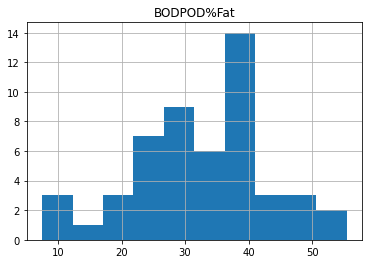

In [7]:
bodpod.hist()
sc.shapiro(bodpod_array)

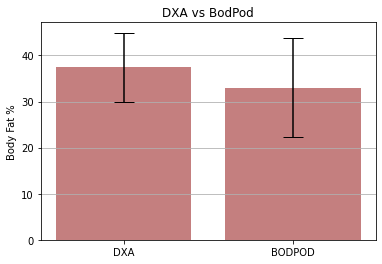

In [8]:
#Messing around with bar graphs and error bars

groups = ['DXA', 'BODPOD']
x = np.arange(len(groups))

bar_dmean = dxa_array.mean()
bar_bmean = bodpod_array.mean()
bar_dstd = dxa_array.std()
bar_bstd = bodpod_array.std()

mean_bf = [bar_dmean, bar_bmean]
error = [bar_dstd, bar_bstd]

figure, axis = mp.subplots()
axis.bar(x, mean_bf, yerr = error, align = 'center', color = '#8b0000', 
         alpha = 0.5, ecolor = 'black', capsize = 10)
axis.set_ylabel('Body Fat %')
axis.set_xticks(x)
axis.set_xticklabels(groups)
axis.set_title('DXA vs BodPod')
axis.yaxis.grid(True)

mp.show()

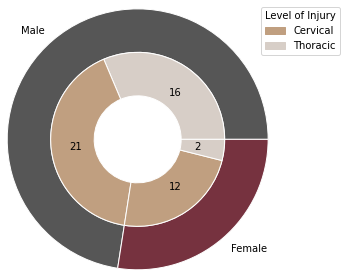

In [9]:
# Messing with pie chart

sex_group = ["Male 37", "Female 14"]
injury_group = ["Thoracic 16", "Cervical 21", "Cervical 12", "Thoracic 2"]

outer_name = [str(axis.split()[0]) for axis in sex_group]
outer_size = [int(axis.split()[-1]) for axis in sex_group]

inner_name = [str(axis.split()[0]) for axis in injury_group]
inner_size = [int(axis.split()[-1]) for axis in injury_group]

outer_colors = ['#565656','#76323f']
inner_colors = ['#d7cec7','#c09f80','#c09f80','#d7cec7']

figure, axis = mp.subplots()

layer1 = axis.pie(outer_size, labels = outer_name, colors = outer_colors, radius = 1.5,
                  wedgeprops=dict(width=0.5, edgecolor='w'))

layer2 = axis.pie(inner_size, labels = inner_size, colors = inner_colors, radius = 1.5-0.5, 
                  labeldistance = 0.65, wedgeprops=dict(width=0.5, edgecolor='w'))

legend_name = ["Cervical", "Thoracic"]
test = mp.legend(legend_name, title="Level of Injury", loc="center", bbox_to_anchor=(1, 0.5, 0.5, 1))

test.legendHandles[0].set_color('#c09f80')
test.legendHandles[1].set_color('#d7cec7')

mp.show()


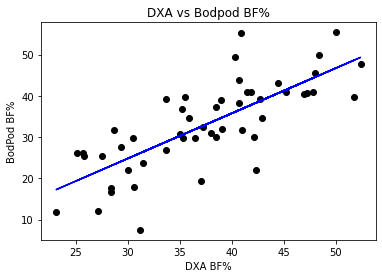

0.758752173206576

In [10]:
# Creating scatter plot

# labels and data points
mp.scatter(dxa_array, bodpod_array, c = 'black')
mp.xlabel("DXA BF%")
mp.ylabel ("BodPod BF%")
mp.title("DXA vs Bodpod BF%")

# creating trendline
z = np.polyfit(dxa_array, bodpod_array, 1) #Returns a vector of coefficients p
p = np.poly1d(z)
mp.plot(dxa_array, p(dxa_array), "b-")

# Correlation
r = np.corrcoef(dxa_array, bodpod_array)

               
mp.show()
r[0, 1]


In [11]:
print(df.var())

f = 56.856102 / 118.107867 # var of dxa/bodpod

df1 = len(dxa_array)-1
df2 = len(bodpod_array)-1

#alpha = 0.05, null hypothesis = variances are equal
              #alt hypothesis = variances are unequal

var_pvalue = sc.f.cdf(f, df1, df2)
print(var_pvalue)

#alpha = 0.05, null hypothesis = means are equal
              #alt hypothesis = means are unequal

pvalue = sc.ttest_ind(dxa_array, bodpod_array, equal_var = False, alternative = 'two-sided')
print(pvalue)

#The dxa and bodpod means are not equal. 


DXA%Fat        56.856102
BODPOD%Fat    118.107867
dtype: float64
0.005476693942788216
Ttest_indResult(statistic=2.4242426288512195, pvalue=0.017360708996581438)
